# Sample Random Graphs and Datasets

We will generate mixed discrete-continuous and nonlinear observational data based upon the mixed additive noise model (MANM). This will be based on the [MANM python package](https://github.com/hpi-epic/manm-cs).

NOTE: for now, we are only simulating causal DAGs, not ADMGs.

In [37]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import os
from pathlib import Path
from pprint import pprint

import numpy as np
import bnlearn as bn
import networkx as nx

import causal_networkx
from causal_networkx.ci import (
    g_square_discrete,
    fisherz,
    g_square_binary,
    Oracle,
    ParentOracle,
)
from causal_networkx.discovery import PC, RobustPC
from causal_networkx.io import load_from_pgmpy
from causal_networkx.simulation.random import simulate_random_graphs_manm_cs
from causal_networkx.io import read_dot, load_from_networkx

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
np.random.seed(12345)

# Simulate One Graph

In [41]:
n_nodes = 5
edge_density = 0.3
n_samples = 1000
graph, df, builder = simulate_random_graphs_manm_cs(
    n_nodes=n_nodes,
    edge_density=edge_density,
    n_samples=n_samples,
)

(1000, 5)


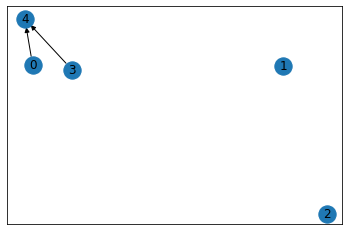

In [42]:
print(graph)
graph.draw()
print(df.shape)

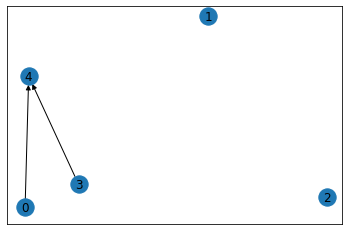

In [44]:
fname = "/Users/adam2392/Downloads/test.gml"

graph.save(fname, format="networkx-gml")

read_graph = nx.read_gml(fname)
test_graph = load_from_networkx(read_graph)

test_graph.draw()

# Simulate Now Many Graphs and Save to Dataset

Each graph is defined by a set of parameters in the MANM module:

- number of nodes
- edge density (0 to 1)
- discrete node ratio
- discrete SNR
- number of discrete classes
- continuous noise std
- function type ([linear, quadratic, cubic, tanh, sin, cos])

In [9]:
idx = 0
output_dir = "/Users/adam2392/Downloads/"
fname = f"graph_{idx}.dot"
json_fname = f"graph_{idx}.json"

json_dict = {
    "idx": idx,
    "n_nodes": builder.num_nodes,
    "n_samples": n_samples,
    "edge_density": builder.edge_density,
    "discrete_node_ratio": builder.discrete_node_ratio,
    "conditional_gaussian": builder.conditional_gaussian,
    "discrete_signal_to_noise_ratio": builder.discrete_signal_to_noise_ratio,
    "min_discrete_value_classes": builder.min_discrete_value_classes,
    "max_discrete_value_classes": builder.max_discrete_value_classes,
    "continuous_noise_std": builder.continuous_noise_std,
    "beta_lower_limit": builder.beta_lower_limit,
    "beta_upper_limit": builder.beta_upper_limit,
    "functions": builder.functions,
}

In [36]:
for discrete_node_ratio in np.linspace(0, 1, 11):
    print(discrete_node_ratio)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


In [ ]:
n_samples = 1000
discrete_node_ratio = 0.5

# TODO: see if literature has hints on setting alpha
# todo: causal structure learning for correcting for pvalues
# during local learning i.e. X \perp Y | Z
#
# IDEAS: 
# - correction based on statistical information aka FDR/Bonf
# - correction based on some non-causal structure aka adjacency paths
# 
# discrete_node_ratio is 0 -> maybe use partial corr, or KCI if insufficient
# start with functions = linear
alpha = # iterate over various numbers


for n_nodes in range(5, 15):
    for edge_density in np.linspace(0.1, 0.9, 9):
        # for discrete_node_ratio in np.linspace(0, 1, 11):
            graph, df, builder = simulate_random_graphs_manm_cs(
                n_nodes=n_nodes,
                edge_density=edge_density,
                n_samples=n_samples,
            )